# Week 2 assignment

## Introduction about the analysis

A complete introduction was given in the [Week 1 assignment](https://github.com/srodriguex/coursera_regression_modeling_practice/blob/master/Week_1.md). Please, refer to this entry to be acquainted to the Gapminder dataset donated to this Coursera Regression Modeling in Practice course, the sample and procedure of data collected. 


## Requirements to reproduce this analysis

This is a PDF version of an IPython Notebook. [Click here](https://github.com/srodriguex/coursera_regression_modeling_practice/blob/master/Week_2.ipynb) to access the source version to reproduce this analysis.

In order to run this notebook on your local machine, you must have:

* [Python interpreter](http://python.org) => 3.4
* [IPython Notebook](http://ipython.org) >= 4.0 

In order to ease the installation of Python, libraries and tools, give a chance to [Anaconda distribution](https://www.continuum.io/downloads).



# Variables

This exercise requires only a simple linear regression.In other words, this means taking a single reponse variable, and a single explanatory variable.

I could chose at random any explanatory variable I've selected from all variables available in the Gapminder Dataset from Week 1 assignment, but lets keep calm and choose rationaly the best variable we have. For best variable I mean the variable which correlation with the response variable is the most. For this, I'll print the correlation matrix to help me find it.

In [1]:
# Imports section.

# Import all Numpy, Scipy and matplolib stuff.
%pylab inline

# Silence some warnings about converting data.
import warnings
warnings.simplefilter('ignore', Warning)

# Library to deal with dataframes like in R.
import pandas as pd

# Nice looking plotting libray for statistical analysis.
import seaborn as sn

# Package for running linear regressions using R like formulas.
from statsmodels.formula.api import ols



Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read the dataset into a pandas.DataFrame object.
df = pd.read_csv('./data/gapminder.csv')

# Define the countries as the index. 
df.index = df.country

# As it's the index, we can remove the column.
del df['country']

# Subset the dataframe to the desired variables.
df = df[['lifeexpectancy','incomeperperson','alcconsumption','co2emissions', 'employrate']]

# Convert all to numeric, and put NaN in missing values.
df = df.convert_objects(convert_numeric=True)


### Pearson Correlation between the variables

For curiosity, let's take a look at pairwise correlation between the variables.

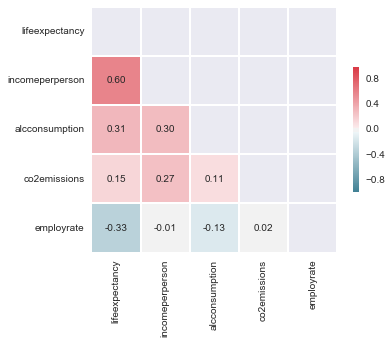

In [3]:
# Get pandas to calculate pairwise correlations.
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# A wild plot appears!
f, ax = plt.subplots(figsize=(11*.5, 9*.5))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, 
           annot=True, fmt='.2f' );

From the matrix correlation plot above it's clear that `incomeperperson` is the best variable available from the subselection I've already made in the Week 1 assignment.

So, in resume, my variables chosen to this simple linear regression are:

* Response variable: **Life expectancy**
> 2011 life expectancy at birth (years)
The average number of years a newborn child would live if current
mortality patterns were to stay the same.

* Explanatory variable: **Income per person**
> 2010 Gross Domestic Product per capita in constant 2000 US$. The
inflation but not the differences in the cost of living between countries
has been taken into account.

## Descriptive analysis

Pandas DataFrame has nice methods to summary the data at hand.

In [4]:
# Subselecting only the variables chosen.
df = df[['lifeexpectancy', 'incomeperperson']]

# Concise summary about the structure of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
lifeexpectancy     191 non-null float64
incomeperperson    190 non-null float64
dtypes: float64(2)
memory usage: 5.0+ KB


In [5]:
# Overview of summary statistics.
df.describe()

,lifeexpectancy,incomeperperson
count,191.000000,190.000000
mean,69.753524,8740.966076
std,9.708621,14262.809083
min,47.794000,103.775857
25%,64.447000,748.245151
50%,73.131000,2553.496056
75%,76.593000,9379.891165
max,83.394000,105147.437697


We see that this dataset has a total of 213 observations, each one corresponding to a country. Unfortunately, both reponse and explanatory variables has missing values. Given that each country is sovereign and theoretically independent from the others, we can't assume any way to fill in those missing values by averaging neighbor countries, neither can we set zero values to them. So, in the sake of simplicity, we'll just drop all contries with any missing values.

In [6]:
# Drop all rows with any missing value.

# Number of rows before dropping data.
num_before = len(df) 

# Drop the missing values.
df = df.dropna()

# Number of rows after dropping data.
num_after = len(df) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176 entries, Albania to Zimbabwe
Data columns (total 2 columns):
lifeexpectancy     176 non-null float64
incomeperperson    176 non-null float64
dtypes: float64(2)
memory usage: 4.1+ KB


In [8]:
df.describe()

,lifeexpectancy,incomeperperson
count,176.000000,176.000000
mean,69.654733,7327.444414
std,9.729521,10567.304022
min,47.794000,103.775857
25%,63.041500,702.366463
50%,73.126500,2385.184105
75%,76.569500,8497.779228
max,83.394000,52301.587179


In [14]:
print('It had {} rows, now it has {} rows. {} rows were dropped due to missgin data.'.format(
        num_before, num_after, num_after-num_before))

It had 213 rows, now it has 176 rows. -37 rows were dropped due to missgin data.


This management of the missing values lowered our set from 213 observations to 176, around 83%, not a big deal. 

## Frequency distribution as histograms

These variables assume a continuous range, so I think histogramas a  better to visualize the distribution rather than a raw table full of numbers as would be the frequency tables. The `hist` method from `pandas.DataFrame` object comes in our help in plotting automatically histograms for all the variables within the dataframe object, and we just have to config the size and bins desired.

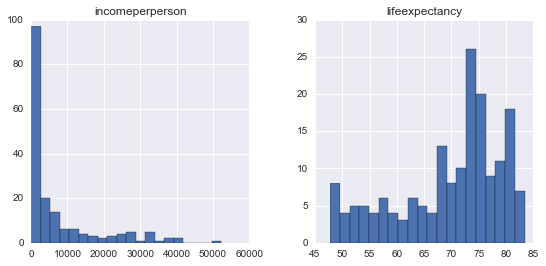

In [27]:
df.hist(bins=20, figsize=(9,4));

## Centering the variables

The image above shows that income per person variable is not fairly distributed along x axis, it's highly left skewed. Let's manage this data subtracting their respective means, namely, centering them.

In [28]:
# Subtract the mean.
dfmean = df - df.mean()

# Summarize again.
dfmean.describe()

,lifeexpectancy,incomeperperson
count,1.760000e+02,1.760000e+02
mean,3.108624e-15,-9.508354e-13
std,9.729521e+00,1.056730e+04
min,-2.186073e+01,-7.223669e+03
25%,-6.613233e+00,-6.625078e+03
50%,3.471767e+00,-4.942260e+03
75%,6.914767e+00,1.170335e+03
max,1.373927e+01,4.497414e+04


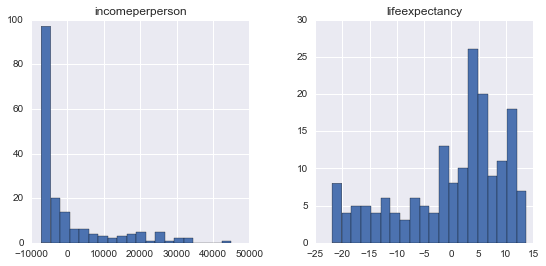

In [29]:
dfmean.hist(bins=20, figsize=(9,4));

It shouldn't be a surpise that the shape of the histograms didn't change at all, because centering a variable is just a linear transformation over $x$ axis, centenring them around the mean at  $x=0$, this don't work well for exponential distributions though.

# Linear Regression

In this section well run the simple linear model for the two variables at hand.

## First model

In [24]:
# Formula for the linear regression with the selected variables.
formula='lifeexpectancy ~ incomeperperson'

# Prepare and fit the model to the least squared error.
model = ols(formula=formula, data=dfmean)
res = model.fit()

# Output the summary.
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     98.65
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           1.07e-18
Time:                        23:03:36   Log-Likelihood:                -610.14
No. Observations:                 176   AIC:                             1224.
Df Residuals:                     174   BIC:                             1231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         3.22e-15      0.588   5.48e-15      1.000        -1.160     1.160
incomeperperson     0.0006   5.58e-05      9.932      0.000         0.000     0.001
==============================================================================
Omnibus:                       19.382   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.222
Skew:                          -0.877   Prob(JB):                     9.06e-06
Kurtosis:                       2.698   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The `incomeperperson` has p-value inside our significacne Now the remaining explanatory variables have p-value of 0.000 at 3 decimals precision below the significance level of 0.05, so, we can reject the nulll hypothesis $H_0$ that this coefficient is equals zero and the the alternative $H_a$ that is different from zero. But note that this coeficcient for income per person is too low, meaning that each unit increment in this variable reflects in 0.0006 unit in life expectancy. This is due to the exponential relationship of income vs life expectancy rather than linear, as we can see in the scatter plot below.

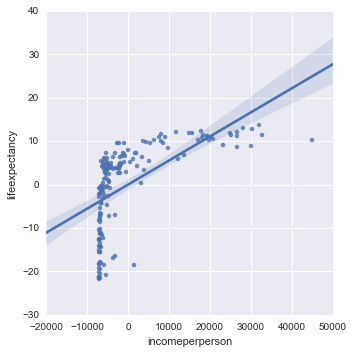

In [25]:
sn.lmplot('incomeperperson', 'lifeexpectancy', dfmean);

To address this issue we'll transform the income per person variable into a log function. See how the scatter plot below behaves after this transformation. 

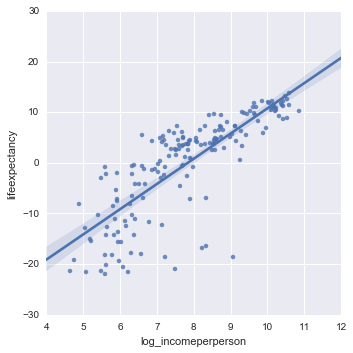

In [26]:
dfmean['log_incomeperperson'] = log(df.incomeperperson)
sn.lmplot('log_incomeperperson', 'lifeexpectancy', dfmean);


We now have a linear correlation but the interpretation over this log transformation over the variable must be adjusted. According to [this article](http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm), a fixed change in say $d\%$ in the log explanatory variable will result in a fixed changed of $\beta_1*log((1+d/100))$, for $\beta_1$ the respective coefficient in the new model below for the log(incomeperperson) variable.

## Second and final model

In [28]:
formula='lifeexpectancy ~ log(incomeperperson)'
model = ols(formula=formula, data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     315.5
Date:                Thu, 26 Nov 2015   Prob (F-statistic):           6.20e-41
Time:                        23:09:56   Log-Likelihood:                -558.64
No. Observations:                 176   AIC:                             1121.
Df Residuals:                     174   BIC:                             1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               30.6379      2.240     13.678      0.000        26.217    35.059
log(incomeperperson)     4.9773      0.280     17.763      0.000         4.424     5.530
==============================================================================
Omnibus:                       45.848   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.175
Skew:                          -1.215   Prob(JB):                     1.59e-20
Kurtosis:                       5.556   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So, by the model above, for the log of income per person explanatory variable, `log(incomeperperson)`, say, a fixed 10% change in this explanatory variable changes the response variable in $4.98*log(1.10) = 0.47$ units, according to a positive correlation.

By the result above, we can sate that the life expectancy is benefited by a rise in income per person. We may interpret this as that the more the income, the more a person can invest in a healthier way of life and welcare, anything that prevents an early death, but the real reasons demand a proper investigation beyond the scope of this exercise.


The end.